# Limpeza de bases difíceis



## Os dados não começam na primeira linha! E agora?

In [95]:
clientes = pd.read_excel('dados/base-suja.xlsx')
clientes.head(5)

,Marketing campain data - 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Dirty dataset made by Felipe Buchbinder,NaN,NaN,NaN,NaN,NaN
1,Hope you have fun cleaning it!,NaN,NaN,NaN,NaN,NaN
2,id,job,marital,education,e-mail,age
3,1,unemployed,married,"MSc, PhD or equivalent",id1@gmail.com,30 yeard old
4,2,services,married,college,id2@gmail.com,33 yeard old


In [96]:
clientes = pd.read_excel('dados/base-suja.xlsx', skiprows=3)
clientes.head(5)

,id,job,marital,education,e-mail,age
0,1,unemployed,married,"MSc, PhD or equivalent",id1@gmail.com,30 yeard old
1,2,services,married,college,id2@gmail.com,33 yeard old
2,3,management,single,high school,id3@gmail.com,35 yeard old
3,4,management,married,"MSc, PhD or equivalent",id4@gmail.com,30 yeard old
4,5,NaN,married,NaN,id5@gmail.com,59 yeard old


## O índice não corresponde ao identificador

In [97]:
clientes =clientes.set_index('id')
clientes.head()

,job,marital,education,e-mail,age
id,,,,,
1,unemployed,married,"MSc, PhD or equivalent",id1@gmail.com,30 yeard old
2,services,married,college,id2@gmail.com,33 yeard old
3,management,single,high school,id3@gmail.com,35 yeard old
4,management,married,"MSc, PhD or equivalent",id4@gmail.com,30 yeard old
5,NaN,married,NaN,id5@gmail.com,59 yeard old


## Coluna `age` tem números e unidades! Quero só o número!

In [98]:
clientes.age.str.split(' ').head()

id
1    [30, yeard, old]
2    [33, yeard, old]
3    [35, yeard, old]
4    [30, yeard, old]
5    [59, yeard, old]
Name: age, dtype: object

In [99]:
clientes['age'] = clientes.age.str.split(' ').apply(lambda x: x[0])
clientes.head()

,job,marital,education,e-mail,age
id,,,,,
1,unemployed,married,"MSc, PhD or equivalent",id1@gmail.com,30
2,services,married,college,id2@gmail.com,33
3,management,single,high school,id3@gmail.com,35
4,management,married,"MSc, PhD or equivalent",id4@gmail.com,30
5,NaN,married,NaN,id5@gmail.com,59


## Parte da informação está em outra tabela!

In [100]:
resultado_campanha = pd.read_excel('dados/base-suja.xlsx', 
                                   sheet_name='campaign-result', 
                                   index_col='id')
resultado_campanha.head(5)

,contact,buy
id,,
1,cellular,no
2,cellular,no
3,cellular,no
4,unknown,NaN
5,unknown,no


In [101]:
df = pd.merge(clientes, resultado_campanha, 
              how = 'left', 
              on='id',
              validate='1:1', 
              indicator=True)

df.head()

,job,marital,education,e-mail,age,contact,buy,_merge
id,,,,,,,,
1,unemployed,married,"MSc, PhD or equivalent",id1@gmail.com,30,cellular,no,both
2,services,married,college,id2@gmail.com,33,cellular,no,both
3,management,single,high school,id3@gmail.com,35,cellular,no,both
4,management,married,"MSc, PhD or equivalent",id4@gmail.com,30,unknown,NaN,both
5,NaN,married,NaN,id5@gmail.com,59,unknown,no,both


In [102]:
clientes.shape, resultado_campanha.shape, df.shape

((4521, 5), (4519, 2), (4521, 8))

## Identificando problemas silenciosos na junção das bases

In [103]:
df[df._merge!='both']

,job,marital,education,e-mail,age,contact,buy,_merge
id,,,,,,,,
37,retired,divorced,high school,id37@gmail.com,78,NaN,NaN,left_only
73,management,single,"MSc, PhD or equivalent",NaN,31,NaN,NaN,left_only


In [104]:
df = df[df._merge == 'both']
df = df.drop(columns = ['_merge'])

In [105]:
df.shape

(4519, 7)

In [106]:
df.head()

,job,marital,education,e-mail,age,contact,buy
id,,,,,,,
1,unemployed,married,"MSc, PhD or equivalent",id1@gmail.com,30,cellular,no
2,services,married,college,id2@gmail.com,33,cellular,no
3,management,single,high school,id3@gmail.com,35,cellular,no
4,management,married,"MSc, PhD or equivalent",id4@gmail.com,30,unknown,NaN
5,NaN,married,NaN,id5@gmail.com,59,unknown,no


## Trocando "yes" e "no" por True e False

In [107]:
df.buy.value_counts()

no     3995
yes     515
Name: buy, dtype: int64

In [108]:
df['buy'] = df.buy.replace({'yes': True, 'no': False})
df.buy.value_counts()

False    3995
True      515
Name: buy, dtype: int64

## Corrigindo o tipo das variáveis

In [109]:
df.dtypes

job          object
marital      object
education    object
e-mail       object
age          object
contact      object
buy          object
dtype: object

In [110]:
df['age'] = df.age.astype('int')
df['buy'] = df.buy.astype('bool')

df.dtypes

job          object
marital      object
education    object
e-mail       object
age           int32
contact      object
buy            bool
dtype: object

In [111]:
df.buy.value_counts()

False    3995
True      524
Name: buy, dtype: int64

## Identificando missing values

In [112]:
df.isnull().sum()

job             2
marital         0
education       2
e-mail       4464
age             0
contact        39
buy             0
dtype: int64

In [113]:
df.isnull().mean()

job          0.000443
marital      0.000000
education    0.000443
e-mail       0.987829
age          0.000000
contact      0.008630
buy          0.000000
dtype: float64

In [114]:
#!pip install missingno

In [115]:
import missingno as mn

<AxesSubplot:>

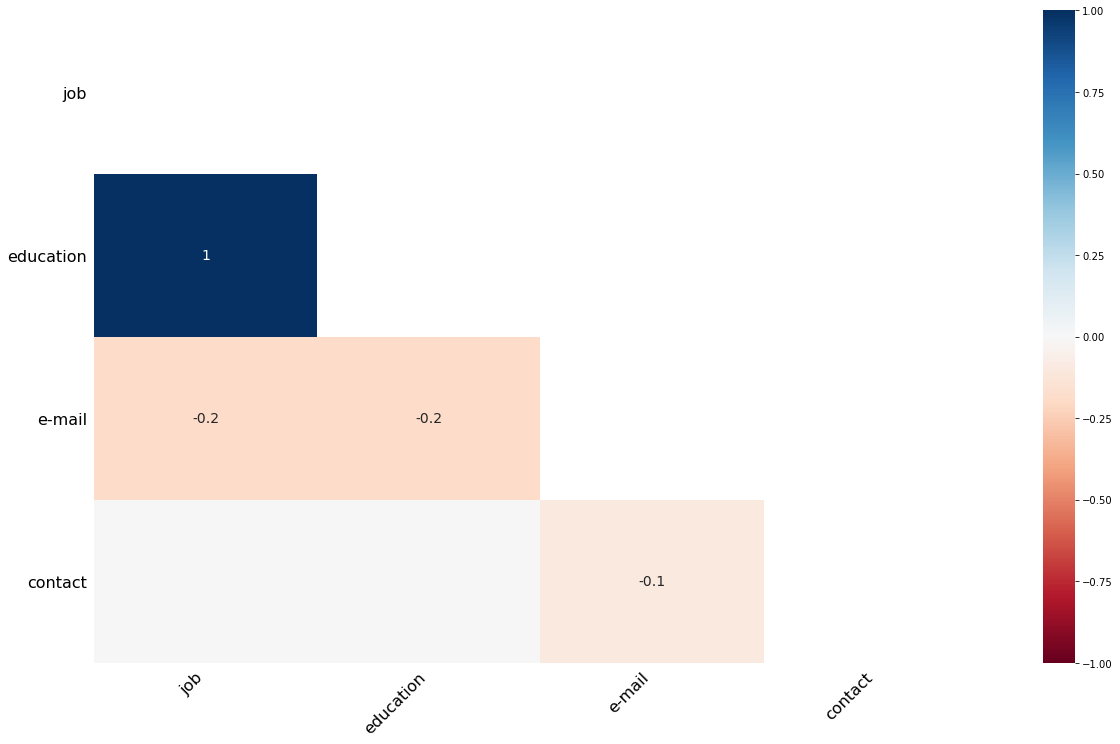

In [116]:
mn.heatmap(df)

## Tratando missing values

* Retirar variável da base
* Retirar observação da base
* Imputar valor

### Coluna `e-mail`

In [117]:
df = df.drop(columns = ['e-mail'])

In [118]:
df.columns

Index(['job', 'marital', 'education', 'age', 'contact', 'buy'], dtype='object')

### Coluna  `job`

Apenas 2 casos -> retirar da base.

In [119]:
df = df[~df.job.isnull()]

In [120]:
df.isnull().sum()

job           0
marital       0
education     0
age           0
contact      39
buy           0
dtype: int64

Coluna `education` agora está sem missing, já que eram os mesmos casos que tinham `job` missing.

## Coluna `contact`

In [121]:
df.contact.value_counts()

cellular     2895
unknown      1283
telephone     300
Name: contact, dtype: int64

Substituir missing por _unknown_

In [122]:
df['contact'] = df.contact.fillna('unknown')

In [123]:
df.contact.value_counts()

cellular     2895
unknown      1322
telephone     300
Name: contact, dtype: int64

In [124]:
df.isnull().sum()

job          0
marital      0
education    0
age          0
contact      0
buy          0
dtype: int64

__obs.:__ Também podemos usar a função `fillna` para imputar um valor numérico, como a média da variável, por exemplo. 

In [125]:
df.head()

,job,marital,education,age,contact,buy
id,,,,,,
1,unemployed,married,"MSc, PhD or equivalent",30,cellular,False
2,services,married,college,33,cellular,False
3,management,single,high school,35,cellular,False
4,management,married,"MSc, PhD or equivalent",30,unknown,True
6,management,single,"MSc, PhD or equivalent",35,cellular,False


## Reduzindo o número de categorias (cardinalidade)

In [126]:
df.job.value_counts()

management       968
blue-collar      945
technician       768
admin.           478
services         416
retired          229
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

In [127]:
top3 = df.job.value_counts()[:3].index
top3

Index(['management', 'blue-collar', 'technician'], dtype='object')

In [128]:
#Quem não está no top 3
df.job.apply(lambda x: x not in top3)

id
1        True
2        True
3       False
4       False
6       False
        ...  
4517     True
4518     True
4519    False
4520    False
4521     True
Name: job, Length: 4517, dtype: bool

In [129]:
df.loc[df.job.apply(lambda x: x not in top3),'job'] = 'other'

In [130]:
df.job.value_counts()

other          1836
management      968
blue-collar     945
technician      768
Name: job, dtype: int64

In [131]:
df.head()

,job,marital,education,age,contact,buy
id,,,,,,
1,other,married,"MSc, PhD or equivalent",30,cellular,False
2,other,married,college,33,cellular,False
3,management,single,high school,35,cellular,False
4,management,married,"MSc, PhD or equivalent",30,unknown,True
6,management,single,"MSc, PhD or equivalent",35,cellular,False


## Ordenando categorias

<AxesSubplot:xlabel='education', ylabel='age'>

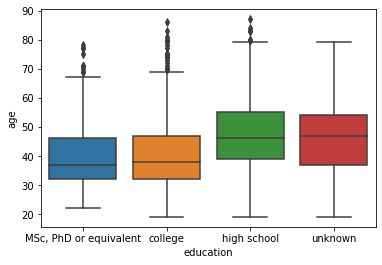

In [132]:
import seaborn as sns
sns.boxplot('education','age', data=df)

In [133]:
df['education'].dtype

dtype('O')

In [134]:
df['education'] = df.education.astype('category')
df['education'].dtype

CategoricalDtype(categories=['MSc, PhD or equivalent', 'college', 'high school',
                  'unknown'],
, ordered=False)

In [137]:
df['education'] = df.education.cat.reorder_categories(['high school',
                                                       'college',
                                                       'MSc, PhD or equivalent',
                                                       'unknown'],
                                                      ordered=True)

<AxesSubplot:xlabel='education', ylabel='age'>

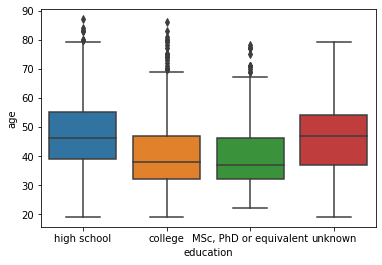

In [138]:
sns.boxplot('education','age', data=df)

In [157]:
#Fazer a mesma coisa para estado civil
df['marital'] = df.marital.astype('category')
df['marital'] = df.marital.cat.reorder_categories(['single',
                                                   'married',
                                                   'divorced'],
                                                  ordered=True)

## Base limpa

In [139]:
df

,job,marital,education,age,contact,buy
id,,,,,,
1,other,married,"MSc, PhD or equivalent",30,cellular,False
2,other,married,college,33,cellular,False
3,management,single,high school,35,cellular,False
4,management,married,"MSc, PhD or equivalent",30,unknown,True
6,management,single,"MSc, PhD or equivalent",35,cellular,False
7,other,married,"MSc, PhD or equivalent",36,cellular,False
8,technician,married,college,39,cellular,False
9,other,married,"MSc, PhD or equivalent",41,unknown,False
11,other,married,college,39,unknown,False
